Nutrition and Wellness Data Analysis

DataSet Source: https://www.kaggle.com/datasets/khushikyad001/healthy-eating-dataset

# Name : Y. Durga Prasad
# 2211CS010697
# S-5[90]

In [1]:
# -------- 1. IMPORT LIBRARIES --------
from pyspark.sql import SparkSession

# -------- 2. LOAD DATA --------
file_path = "Nutrition_and_Wellness_Data.csv"
spark = SparkSession.builder.appName("NutritionWellnessAnalysis").getOrCreate()
df = spark.read.csv(file_path, header=True, inferSchema=True)

# -------- 3. BASIC INFO --------
print("Dataset Shape:", (df.count(), len(df.columns)))  # (rows, columns)
print("\nDataset Preview:")
df.show(5)

print("\nDataset Info:")
df.printSchema()

print("\nMissing Values Per Column:")
from pyspark.sql.functions import col, sum as pyspark_sum
missing_counts = df.select([pyspark_sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])
missing_counts.show()


Dataset Shape: (2000, 20)

Dataset Preview:
+-------+-------------+-------+---------+---------+--------+---------+-------+-----+-------+-------+---------+--------------+--------------+--------------+-------------+-------------+------+----------+--------------------+
|meal_id|    meal_name|cuisine|meal_type|diet_type|calories|protein_g|carbs_g|fat_g|fiber_g|sugar_g|sodium_mg|cholesterol_mg|serving_size_g|cooking_method|prep_time_min|cook_time_min|rating|is_healthy|           image_url|
+-------+-------------+-------+---------+---------+--------+---------+-------+-----+-------+-------+---------+--------------+--------------+--------------+-------------+-------------+------+----------+--------------------+
|      1|    Kid Pasta| Indian|    Lunch|     Keto|     737|     52.4|   43.9| 34.3|   16.8|   42.9|     2079|            91|           206|       Grilled|           47|           56|   4.4|         0|https://example.c...|
|      2| Husband Rice|Mexican|    Lunch|    Paleo|     182|    

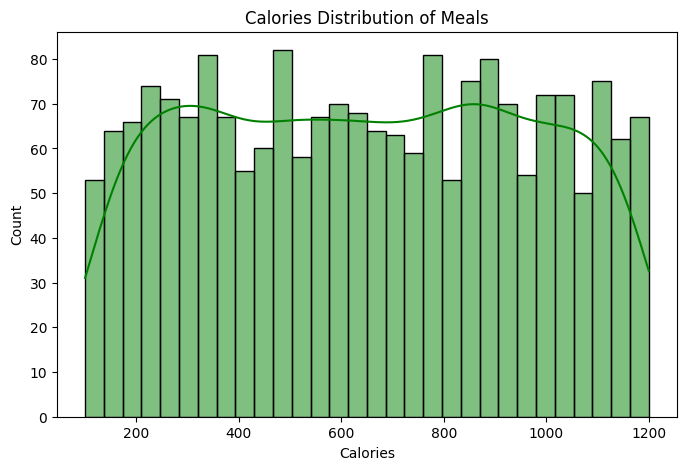

In [3]:
# -------- VISUALIZATIONS --------

# ---- Calories Distribution ----
# Convert 'calories' column to Pandas for visualization
calories_pd = df.select("calories").toPandas()

plt.figure(figsize=(8,5))
sns.histplot(calories_pd['calories'], bins=30, kde=True, color='green')
plt.title("Calories Distribution of Meals")
plt.xlabel("Calories")
plt.ylabel("Count")
plt.show()


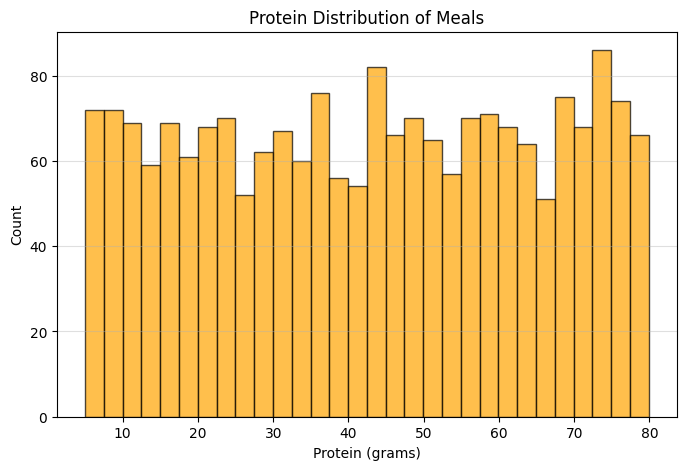

In [8]:
#---Protein Distribution--------
protein_data = df.select(col("protein_g")).dropna().toPandas()

plt.figure(figsize=(8,5))
plt.hist(protein_data['protein_g'], bins=30, color='orange', edgecolor='black', alpha=0.7)
plt.title("Protein Distribution of Meals")
plt.xlabel("Protein (grams)")
plt.ylabel("Count")
plt.grid(axis='y', alpha=0.4)
plt.show()


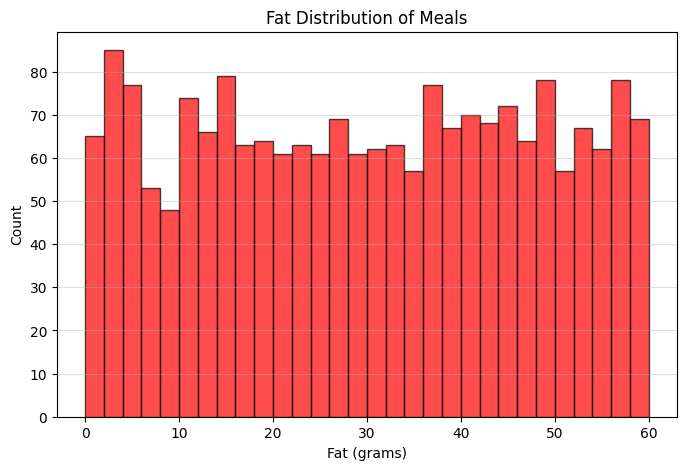

In [7]:
#----Fat Distribution------
fat_data = df.select(col("fat_g")).dropna().toPandas()

plt.figure(figsize=(8,5))
plt.hist(fat_data['fat_g'], bins=30, color='red', edgecolor='black', alpha=0.7)
plt.title("Fat Distribution of Meals")
plt.xlabel("Fat (grams)")
plt.ylabel("Count")
plt.grid(axis='y', alpha=0.4)
plt.show()


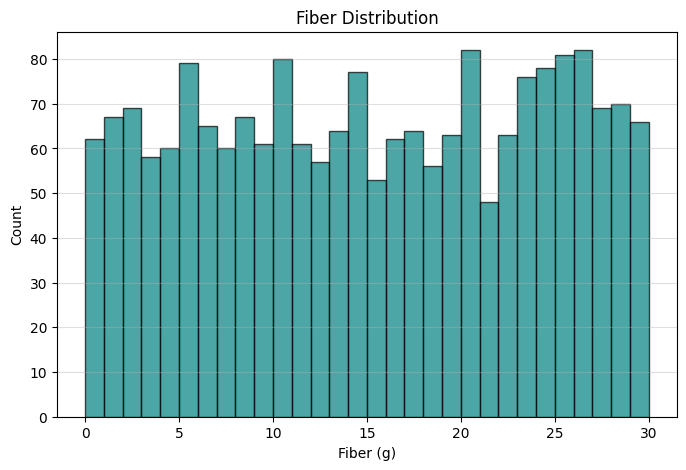

In [9]:
#----Fiber Distribution------

fiber_data = df.select(col("fiber_g")).dropna().toPandas()

plt.figure(figsize=(8,5))
plt.hist(fiber_data['fiber_g'], bins=30, color='teal', edgecolor='black', alpha=0.7)
plt.title("Fiber Distribution")
plt.xlabel("Fiber (g)")
plt.ylabel("Count")
plt.grid(axis='y', alpha=0.4)
plt.show()


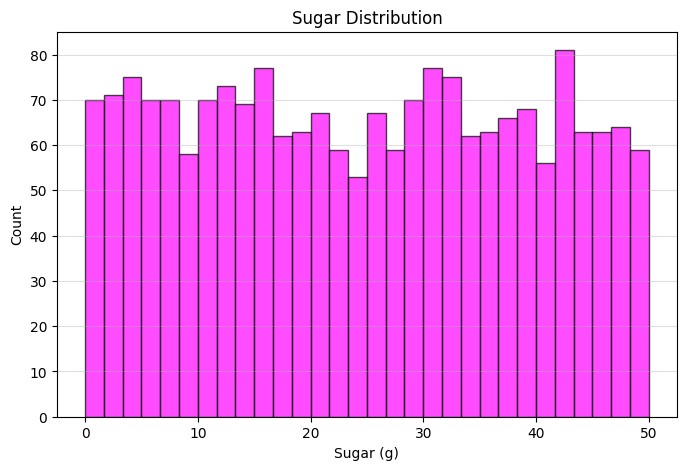

In [10]:
#-----Sugar Distribution-----

sugar_data = df.select(col("sugar_g")).dropna().toPandas()

plt.figure(figsize=(8,5))
plt.hist(sugar_data['sugar_g'], bins=30, color='magenta', edgecolor='black', alpha=0.7)
plt.title("Sugar Distribution")
plt.xlabel("Sugar (g)")
plt.ylabel("Count")
plt.grid(axis='y', alpha=0.4)
plt.show()


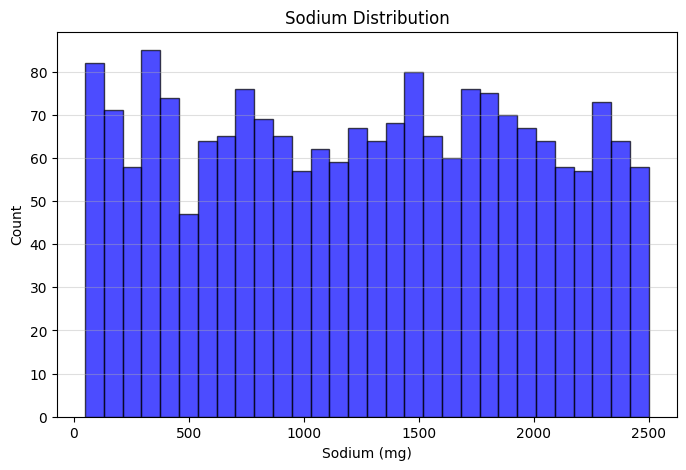

In [11]:
#-----Sodium Distribution------

sodium_data = df.select(col("sodium_mg")).dropna().toPandas()

plt.figure(figsize=(8,5))
plt.hist(sodium_data['sodium_mg'], bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title("Sodium Distribution")
plt.xlabel("Sodium (mg)")
plt.ylabel("Count")
plt.grid(axis='y', alpha=0.4)
plt.show()


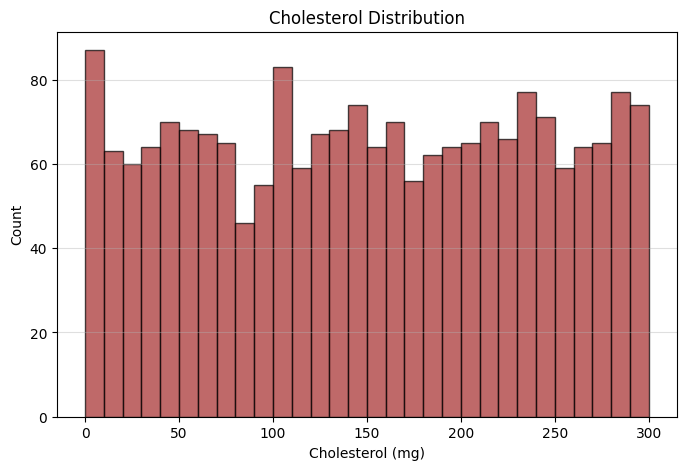

In [12]:
#------Cholesterol Distribution------

cholesterol_data = df.select(col("cholesterol_mg")).dropna().toPandas()

plt.figure(figsize=(8,5))
plt.hist(cholesterol_data['cholesterol_mg'], bins=30, color='brown', edgecolor='black', alpha=0.7)
plt.title("Cholesterol Distribution")
plt.xlabel("Cholesterol (mg)")
plt.ylabel("Count")
plt.grid(axis='y', alpha=0.4)
plt.show()


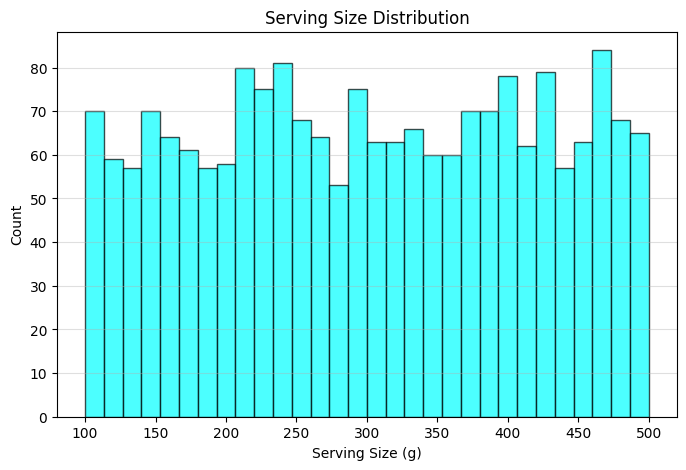

In [13]:
#------Serving Size Distribution------

serving_data = df.select(col("serving_size_g")).dropna().toPandas()

plt.figure(figsize=(8,5))
plt.hist(serving_data['serving_size_g'], bins=30, color='cyan', edgecolor='black', alpha=0.7)
plt.title("Serving Size Distribution")
plt.xlabel("Serving Size (g)")
plt.ylabel("Count")
plt.grid(axis='y', alpha=0.4)
plt.show()


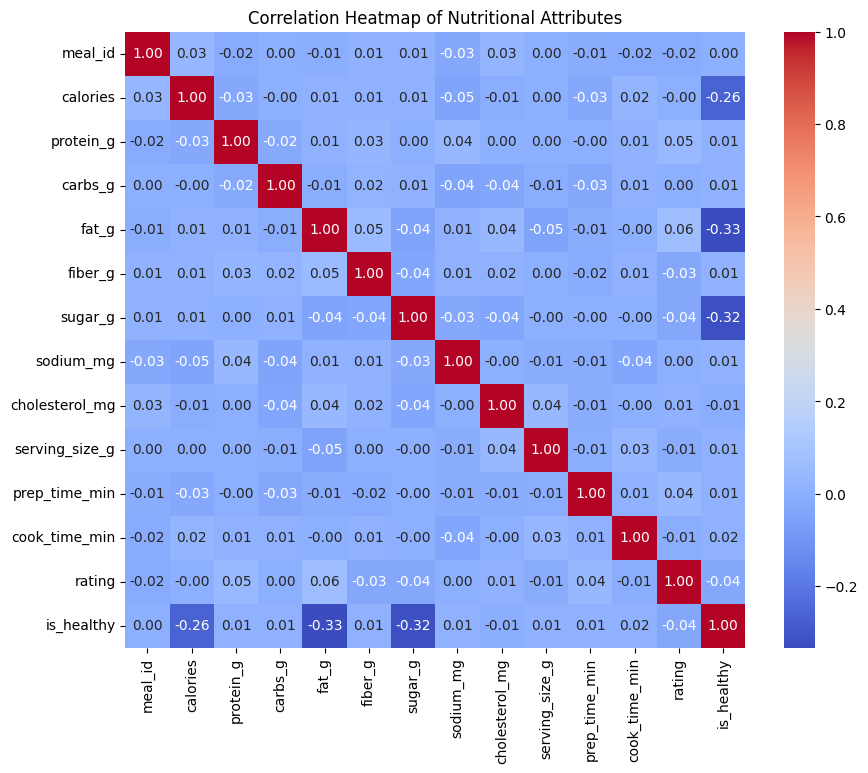

In [17]:
#----Correlation HeatMap (Fixed & Safe)----
from pyspark.sql.functions import col

numeric_cols = [
    field.name for field in df.schema.fields
    if "IntegerType" in str(field.dataType)
    or "DoubleType" in str(field.dataType)
    or "FloatType" in str(field.dataType)
    or "LongType" in str(field.dataType)
    or "ShortType" in str(field.dataType)
]

if not numeric_cols:
    print("No numeric columns found for correlation heatmap.")
else:
    numeric_df = df.select([col(c) for c in numeric_cols]).dropna().toPandas()

    if numeric_df.empty:
        print(" No numeric data available after dropping nulls.")
    else:
        corr = numeric_df.corr()

        plt.figure(figsize=(10,8))
        sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title("Correlation Heatmap of Nutritional Attributes")
        plt.show()


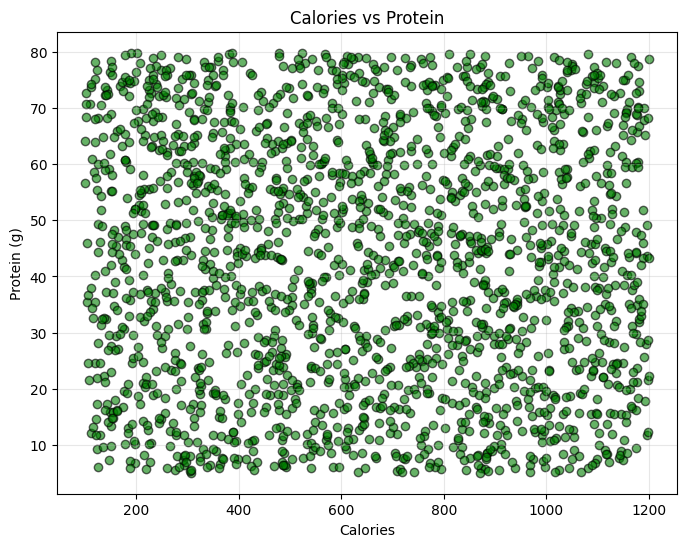

In [18]:
#----Calories vs Protein-------
from pyspark.sql.functions import col

scatter_data = df.select(col("calories"), col("protein_g")).dropna().toPandas()

plt.figure(figsize=(8,6))
plt.scatter(
    scatter_data['calories'],
    scatter_data['protein_g'],
    color='green',
    alpha=0.6,
    edgecolor='k'
)
plt.title("Calories vs Protein")
plt.xlabel("Calories")
plt.ylabel("Protein (g)")
plt.grid(True, alpha=0.3)
plt.show()


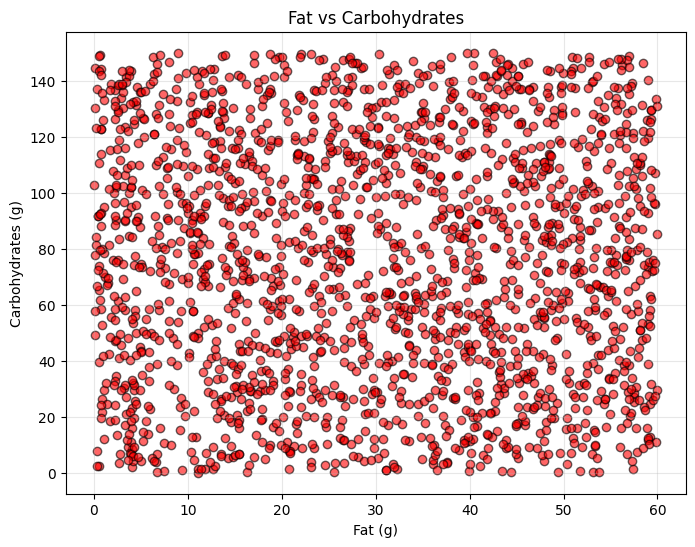

In [20]:
#-----Fat vs Carbohydrates (Scatter Plot)------
from pyspark.sql.functions import col
scatter_data = df.select(col("fat_g"), col("carbs_g")).dropna().toPandas()

plt.figure(figsize=(8,6))
plt.scatter(
    scatter_data['fat_g'],
    scatter_data['carbs_g'],
    color='red',
    alpha=0.6,
    edgecolor='k'
)
plt.title("Fat vs Carbohydrates")
plt.xlabel("Fat (g)")
plt.ylabel("Carbohydrates (g)")
plt.grid(True, alpha=0.3)
plt.show()


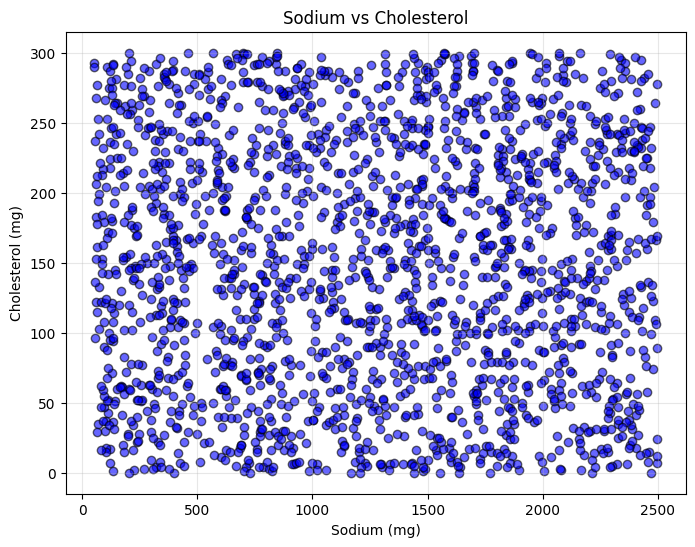

In [22]:
#-----Sodium vs Cholesterol (Scatter Plot)------
from pyspark.sql.functions import col

scatter_data = df.select(col("sodium_mg"), col("cholesterol_mg")).dropna().toPandas()

plt.figure(figsize=(8,6))
plt.scatter(
    scatter_data['sodium_mg'],
    scatter_data['cholesterol_mg'],
    color='blue',
    alpha=0.6,
    edgecolor='k'
)
plt.title("Sodium vs Cholesterol")
plt.xlabel("Sodium (mg)")
plt.ylabel("Cholesterol (mg)")
plt.grid(True, alpha=0.3)
plt.show()


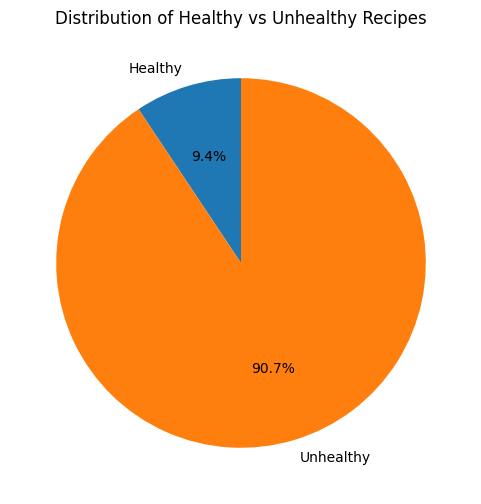

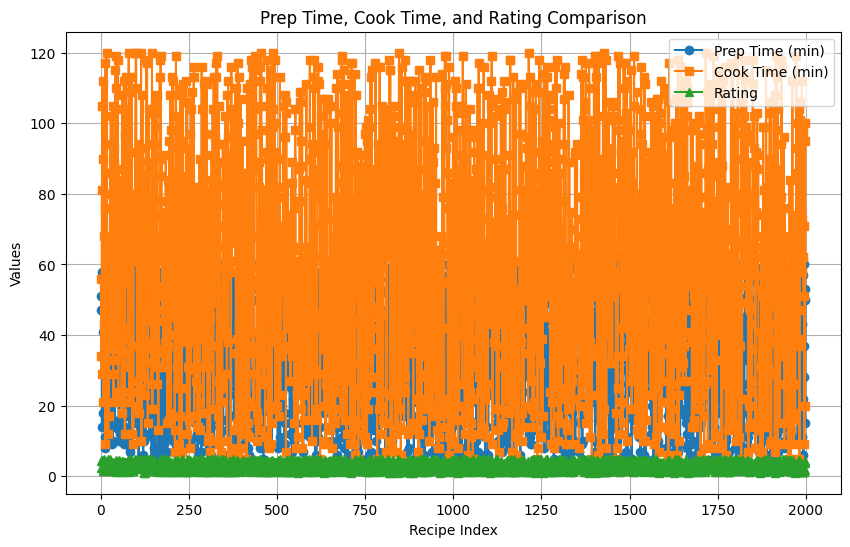

In [24]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import matplotlib.pyplot as plt

# Create Spark session
spark = SparkSession.builder.appName("HealthyEatingAnalysis").getOrCreate()

# Load dataset
df = spark.read.csv("Nutrition_and_Wellness_Data.csv", header=True, inferSchema=True)

# --- Pie Chart: Healthy vs Unhealthy ---
healthy_counts = df.groupBy("is_healthy").count().toPandas()
labels = ['Healthy', 'Unhealthy']
sizes = healthy_counts['count'].tolist()

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Healthy vs Unhealthy Recipes")
plt.show()

# --- Line Graph: Prep time, Cook time, and Rating ---
# Convert relevant columns to Pandas for plotting
line_data = df.select("prep_time_min", "cook_time_min", "rating").dropna().toPandas()

plt.figure(figsize=(10,6))
plt.plot(line_data.index, line_data['prep_time_min'], label='Prep Time (min)', marker='o')
plt.plot(line_data.index, line_data['cook_time_min'], label='Cook Time (min)', marker='s')
plt.plot(line_data.index, line_data['rating'], label='Rating', marker='^')

plt.title("Prep Time, Cook Time, and Rating Comparison")
plt.xlabel("Recipe Index")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.show()


In [25]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import mean, col

# Create Spark session
spark = SparkSession.builder.appName("NutritionWellnessAnalysis").getOrCreate()

# Load dataset
df = spark.read.csv("Nutrition_and_Wellness_Data.csv", header=True, inferSchema=True)

# Calculate average prep and cook time
avg_times = df.select(
    mean(col("prep_time_min")).alias("avg_prep_time"),
    mean(col("cook_time_min")).alias("avg_cook_time")
).collect()[0]

print(f"Average Preparation Time: {avg_times['avg_prep_time']:.2f} minutes")
print(f"Average Cooking Time: {avg_times['avg_cook_time']:.2f} minutes")


Average Preparation Time: 33.35 minutes
Average Cooking Time: 61.51 minutes


In [26]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, desc

# Create Spark session
spark = SparkSession.builder.appName("NutritionWellnessAnalysis").getOrCreate()

# Load dataset
df = spark.read.csv("Nutrition_and_Wellness_Data.csv", header=True, inferSchema=True)

# Get the row with the highest rating
highest = df.orderBy(desc("rating")).limit(1).collect()[0]

print("Recipe with Highest Rating:")
for col_name in df.columns:
    print(f"{col_name}: {highest[col_name]}")


Recipe with Highest Rating:
meal_id: 10
meal_name: Ask Pasta
cuisine: Mexican
meal_type: Dinner
diet_type: Balanced
calories: 671
protein_g: 48.4
carbs_g: 76.4
fat_g: 38.2
fiber_g: 14.7
sugar_g: 29.4
sodium_mg: 1110
cholesterol_mg: 214
serving_size_g: 117
cooking_method: Roasted
prep_time_min: 35
cook_time_min: 68
rating: 5.0
is_healthy: 0
image_url: https://example.com/images/meal_10.jpg


In [27]:
from pyspark.sql import SparkSession

# Create Spark session
spark = SparkSession.builder.appName("NutritionWellnessAnalysis").getOrCreate()

# Load dataset
df = spark.read.csv("Nutrition_and_Wellness_Data.csv", header=True, inferSchema=True)

# Count of Healthy vs Unhealthy recipes
count_healthy = df.groupBy("is_healthy").count().toPandas()

print("Count of Healthy vs Unhealthy Recipes:")
print(count_healthy)


Count of Healthy vs Unhealthy Recipes:
   is_healthy  count
0           1    187
1           0   1813


In [28]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, expr, desc

# Create Spark session
spark = SparkSession.builder.appName("NutritionWellnessAnalysis").getOrCreate()

# Load dataset
df = spark.read.csv("Nutrition_and_Wellness_Data.csv", header=True, inferSchema=True)

# Create a new column 'total_time' = prep_time_min + cook_time_min
df = df.withColumn("total_time", col("prep_time_min") + col("cook_time_min"))

# Get the row with the maximum total_time
max_time_row = df.orderBy(desc("total_time")).limit(1).collect()[0]

print("Recipe that takes the longest time:")
for col_name in df.columns:
    print(f"{col_name}: {max_time_row[col_name]}")



Recipe that takes the longest time:
meal_id: 1469
meal_name: Address Rice
cuisine: Italian
meal_type: Breakfast
diet_type: Balanced
calories: 469
protein_g: 55.2
carbs_g: 60.4
fat_g: 18.4
fiber_g: 2.3
sugar_g: 8.1
sodium_mg: 342
cholesterol_mg: 92
serving_size_g: 268
cooking_method: Raw
prep_time_min: 60
cook_time_min: 119
rating: 4.0
is_healthy: 1
image_url: https://example.com/images/meal_1469.jpg
total_time: 179


In [29]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg

# Create Spark session
spark = SparkSession.builder.appName("NutritionWellnessAnalysis").getOrCreate()

# Load dataset
df = spark.read.csv("Nutrition_and_Wellness_Data.csv", header=True, inferSchema=True)

# Calculate average rating grouped by 'is_healthy'
avg_rating_by_health = df.groupBy("is_healthy").agg(avg("rating").alias("avg_rating")).toPandas()

print("Average Rating by Healthiness:")
print(avg_rating_by_health)


Average Rating by Healthiness:
   is_healthy  avg_rating
0           1    2.856684
1           0    2.997408


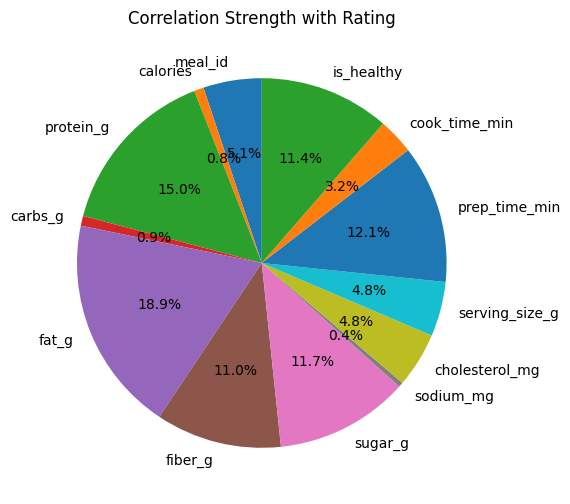

In [42]:

df = pd.read_csv("Nutrition_and_Wellness_Data.csv")

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# --- Compute correlation matrix ---
corr = numeric_df.corr()

# --- PIE CHART: Correlation of each column with 'rating' ---
if 'rating' in numeric_df.columns:
    rating_corr = corr['rating'].drop('rating')  # exclude self-correlation
    plt.figure(figsize=(6,6))
    plt.pie(
        rating_corr.abs(), 
        labels=rating_corr.index,
        autopct='%1.1f%%',
        startangle=90
    )
    plt.title("Correlation Strength with Rating")
    plt.show()
else:
    print("Column 'rating' not found for correlation pie chart.")



In [38]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg

# Create Spark session
spark = SparkSession.builder.appName("NutritionWellnessAnalysis").getOrCreate()

# Load dataset
df = spark.read.csv("Nutrition_and_Wellness_Data.csv", header=True, inferSchema=True)

# Calculate average prep and cook times grouped by 'is_healthy'
avg_times = df.groupBy("is_healthy").agg(
    avg("prep_time_min").alias("avg_prep_time"),
    avg("cook_time_min").alias("avg_cook_time")
).toPandas()

print("Average Preparation and Cooking Time by Healthiness:")
for _, row in avg_times.iterrows():
    health_status = "Healthy" if row['is_healthy'] == 1 else "Unhealthy"
    print(f"{health_status} Recipes → Prep: {row['avg_prep_time']:.1f} min | Cook: {row['avg_cook_time']:.1f} min")


Average Preparation and Cooking Time by Healthiness:
Healthy Recipes → Prep: 34.0 min | Cook: 63.1 min
Unhealthy Recipes → Prep: 33.3 min | Cook: 61.3 min
